## Overview

In this tutorial, you will be introduced to build a simple linear regression model to predict flowers type. We will be covering the following topics:

1. Intrduction to the dataset
2. How to load dataset using Pandas
3. How to split the dataset into training and validation
4. How to train the model in a couple lines of code
5. Plot the dataset

In this tutorial, we are going to use **Logistic Regression** for training our model. As a beginner tutorial, we are not going to cover much details of how logistic regression works. Feel free to read more information about it here: [ https://en.wikipedia.org/wiki/Logistic_regression ]. 

## Introduction to the iris dataset 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant

The dataset has four features:
* sepal_length
* sepal_width
* petal_length
* petal_width

Each plant has been measured on those 4 features and the species is recorded.
The question is, if you see a new plant in the field, could you make a prediction of its species based on these meassurements?

The data is saved in a .csv file.




<img src="resources/three-kinds.png" width="700">

<img src="resources/Iris-image.png" width="500">

<img src="resources/raw-data.png" width="400">

## Load dataset using Pandas

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('iris.csv') # Load data to iris

By default, **head( )** method returns the top 5 rows of dataset

In [3]:
iris.head() # If you want to see more of data, say 20 lines, simply use iris.head(20)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

**info( )** method lists the data type of each columns, number of non-missing values, and memory usage.

In [4]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris.isnull().sum()
#iris.dropna() will remove rows with null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
#Return unique values of Series 'species'
categories = iris['species'].unique()
print(categories)

['setosa' 'versicolor' 'virginica']


In [7]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## Split dataset into training set and validation set

In [8]:
X = iris.iloc[:, 0:4] #all the rows, and column 0 to column 3
y = iris.iloc[:, 4]#all the row, and column 4

In [9]:
X.info() # only works for DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


### Check data type

In [10]:
print("X's type: " + str(type(X)))
print("Y's type: " + str(type(y)))

X's type: <class 'pandas.core.frame.DataFrame'>
Y's type: <class 'pandas.core.series.Series'>


In [11]:
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# test_size should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
# random_state: random seed

In [12]:
print("X_train's shape" + str(X_train.shape))
print("y_train's shape" + str(y_train.shape))
print("X_test's shape" + str(X_test.shape))
print("y_test's shape" + str(y_test.shape))

X_train's shape(120, 4)
y_train's shape(120,)
X_test's shape(30, 4)
y_test's shape(30,)


## Train the model

In [13]:
from sklearn.linear_model import LogisticRegression # Our base model to use
from sklearn import metrics # For model evaluation, qualify the quality of predictions

logreg = LogisticRegression(solver='liblinear', multi_class='auto') # For small datasets, 'liblinear' is a good choice
logreg.fit(X_train, y_train) # Present in sklearn.linear_model.logistic.LogisticRegression module

y_pred = logreg.predict(X_test) #Predict class labels for samples in X_test.
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


<img src="resources/logisticR.png" width="500">

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(logreg.classes_)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
['setosa' 'versicolor' 'virginica']


## Plot the data

In [15]:
# import matplotlib
import matplotlib.pyplot as plt

# seperate each category
setosa = iris[iris["species"]=="setosa"]
versicolor = iris[iris["species"]=="versicolor"]
verginica = iris[iris["species"]=="virginica"]

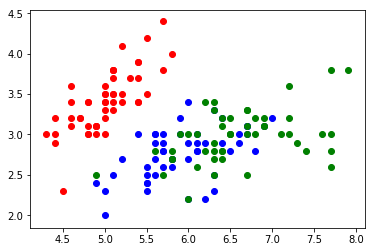

In [16]:
plt.scatter(setosa.values[:, 0], setosa.values[:, 1],c="red" )
plt.scatter(versicolor.values[:, 0], versicolor.values[:, 1], c="blue")
plt.scatter(verginica.values[:,0], verginica.values[:,1], c="green")
plt.show()

## Reference

* https://archive.ics.uci.edu/ml/datasets/iris<br>
* "Python Data Analytics: With Pandas, NumPy, and Matplotlib" 2ed by Fabio Nelli.
* https://www.datacamp.com/community/tutorials/logistic-regression-R